# Portfolio diversification

In this notebook I would like to show how portfolio diversification can improve buy&hold strategy performance over a 5-year period.

## 1. Data

In [1]:
#import libraries and magic
import pandas as pd
from matplotlib import pyplot as plt
import scipy.optimize as sco
import numpy as np
%matplotlib inline

We will consider some well-known IT companies and ETFs. All historical data were downloaded from finance.yahoo.com

In [2]:
ticker_desc = {'AAPL' : 'Apple Inc.',
'AGG' : 'iShares Core U.S. Aggregate Bond ETF',
'EMB' : 'iShares J.P. Morgan USD Emerging Markets Bond ETF',
'FB' : 'Facebook, Inc.',
'GOOGL' : 'Alphabet Inc.',
'SCHE' : 'Schwab Emerging Markets Equity ETF',
'SPY' : 'SPDR S&P 500 Trust ETF',
'VGLT' : 'Vanguard Long-Term Treasury ETF'}

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df

,Date,AAPL,AGG,EMB,FB,GOOGL,SCHE,SPY,VGLT
0,2015-01-02,100.216454,96.557312,84.914139,78.449997,529.549988,20.799383,185.071075,68.333603
1,2015-01-05,97.393181,96.767136,84.370453,77.190002,519.460022,20.457405,181.728745,69.370911
2,2015-01-06,97.402374,97.011963,84.106346,76.150002,506.640015,20.360949,180.017090,70.469254
3,2015-01-07,98.768150,96.994484,85.162704,76.150002,505.149994,20.755539,182.260269,70.321106
4,2015-01-08,102.563072,96.845802,85.527794,78.180000,506.910004,21.132597,185.494492,69.580109
...,...,...,...,...,...,...,...,...,...
1252,2019-12-23,283.327576,111.530540,112.771332,206.179993,1350.630005,27.250000,319.342194,83.163963
1253,2019-12-24,283.596924,111.669670,112.969040,205.119995,1344.430054,27.240000,319.352142,83.482346
1254,2019-12-26,289.223602,111.769035,113.127220,207.789993,1362.469971,27.430000,321.052124,83.631577
1255,2019-12-27,289.113831,111.918083,113.433701,208.100006,1354.640015,27.510000,320.972565,83.750969


## 2. Calculating cumulative return

Let's assume that you had $10,000 back to 2015 and you wanted to invest it with highest return. You could invest it in the big it companies like Apple, Google or Facebook. By the end of 2019 your investment would be (without taxes):

In [5]:
init_investment = 10000
def calc_5y_return(ticker):
    first_price = df[ticker].iloc[0]
    last_price = df[ticker].iloc[-1]
    return round(init_investment* (last_price - first_price) / first_price, 2)

In [6]:
calc_5y_return('AAPL')

19020.16

In [7]:
calc_5y_return('GOOGL')

15299.03

In [8]:
calc_5y_return('FB')

16056.09

It looks very good. In case of investing in Apple you earned \\$1.9 for each \\$1 you invested in 2015.

## 3. Risk measurement

There are various risk measurements, such as standard deviation, beta, etc. I will calculate maximum drawdown which represents the maximum observed loss from a peak to a trough of an investment, before a new peak is attained. In other words max drawdown is a delta between a local maximum and a local minimum of an equity price.

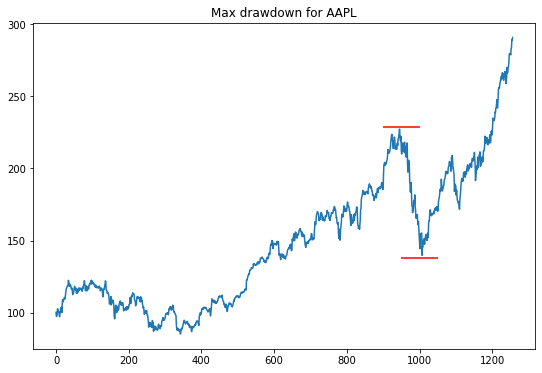

In [9]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot('AAPL', data=df)
ax.hlines(229, xmin = 900, xmax = 1000, colors ='red')
ax.hlines(138, xmin = 950, xmax = 1050, colors ='red')
plt.title('Max drawdown for AAPL')
plt.show()

In [10]:
def max_5y_drawdown(ticker):
    num_shares = init_investment / df[ticker].iloc[0]
    max_val = 0
    max_dd = 0
    loc_min = 0
    loc_max = 0
    for elem in df[ticker]:
        if elem > max_val:
            max_val = elem
        cur_dd = max_val - elem
        if cur_dd > max_dd:
            max_dd = cur_dd
            loc_max = max_val
            loc_min = elem
    portfolio_loc_max = num_shares * loc_max
    portfolio_loc_min = num_shares * loc_min
    return portfolio_loc_max, portfolio_loc_min, (loc_min - loc_max)/loc_min

In [11]:
res = max_5y_drawdown('AAPL')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 22680.94, loc_min = 13945.17, max_dd = -62.64%


In [12]:
res = max_5y_drawdown('GOOGL')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 24275.33, loc_min = 18594.47, max_dd = -30.55%


In [13]:
res = max_5y_drawdown('FB')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 27724.67, loc_min = 15813.89, max_dd = -75.32%


In case of investment in Apple you could loose almost $9k or -62% of your portfolio during this price falling.

## 4. Investing in ETF 

### 4.1. Stock ETF

ETF stands for Exchange traded fund, it usually tracks an stock or bond index which represents a broad variety of issuers including souveregns. E.g. SPY ETF tracks S&P 500 index.

In [14]:
calc_5y_return('SPY')

7247.59

In [15]:
res = max_5y_drawdown('SPY')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 15318.09, loc_min = 12354.20, max_dd = -23.99%


So you will earn 7247.59 that less than investment in IT-giants, but form the other side max drawdown will be around -24%.

### 4.2. Bond ETF

For conservative investors there are ETF which tracks bonds or other fxed income market's instruments. E.g. AGG ETF contains 42% of US Treasury, 12% of Federal National Mortgage Association, etc.	

In [16]:
calc_5y_return('AGG')

1590.84

In [17]:
res = max_5y_drawdown('AGG')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 10630.75, loc_min = 10152.72, max_dd = -4.71%


In this case your income is the smallest, but drawdown is also the smallest among other cases

## 5. Combining stocks and bonds

So how to gain both high return and low risk? The answer is a portfolio diversification. For example if an investor wants to invest in AAPL, GOOGL and FB he/she need to determine how much to invest in each equity (it's also called weight). Let's consider an investor picked to invest 50% in AAPL, 30% in GOOGL and 20% in FB.

In [18]:
df['PORT1'] = 0.5*df['AAPL'] + 0.3*df['GOOGL'] + 0.2*df['FB']

In [19]:
calc_5y_return('PORT1')

16181.85

In [20]:
res = max_5y_drawdown('PORT1')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 23313.72, loc_min = 17464.81, max_dd = -33.49%


As you can see return ($16 181.85) is higher than return in GOOGL or FB, not AAPL. On other hand max drawdown (-33.49%) is lower than max drawdown for AAPL and FB, not GOOGL.

Ok, what if an investor would like to add some fixed income market's instruments to his/her portfolio? Let's consider following: 40% AAPL, 30% GOOGL, 20% FB and 30% AGG. 

In [21]:
df['PORT2'] = 0.4*df['AAPL'] + 0.2*df['GOOGL'] + 0.1*df['FB'] + 0.3*df['AGG']

In [22]:
calc_5y_return('PORT2')

13975.34

In [23]:
res = max_5y_drawdown('PORT2')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 21241.06, loc_min = 16288.56, max_dd = -30.40%


We got $13975.34 as return and -30.40% which indicates that this porfolio is less profitable and less risky than portfolio of stocks only.

## 6. Calculating weights

To calculate weight we can use a Modern portfolio theory to maximize expected return for a given level of risk. To estimate return we will use annual return, for the risk - return's annual standard deviation. A risk-return scatter plot allows us to find an optimum portfolio of AAPL, GOOGL and FB.

### 6.1. Loop weights' combinations

Let's loop every possible weight combination for 3 equities:

In [24]:
weights = []
for i in range(101):
    for j in range(101):
        k = max(0, 100 - (i+j))
        if (i+j+k)==100:
            weights.append([i/100, j/100, k/100])
len(weights)

5151

For all weight combinations let's calculate annualized risk and return: 

In [25]:
an_ret = []
an_std = []
for w in weights:
    portf = w[0]*df['AAPL'] + w[1]*df['GOOGL']+w[2]*df['FB']
    an_ret.append(portf.pct_change().mean()*252)
    an_std.append(np.std(portf.pct_change()) * np.sqrt(252))

Scatter plot will look like a hyperbola:

Text(0, 0.5, 'Return')

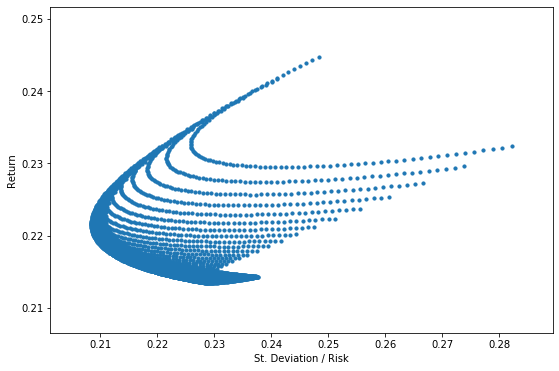

In [26]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(an_std,an_ret,marker='o',s=10)
ax.set_xlabel('St. Deviation / Risk')
ax.set_ylabel('Return')

To find an efficient portfolio we need to find a portfolio with maximum return for a given level of risk. This way an efficient portfolio has to be in upper frontier of the hyperbola. We can use Sharpe Ratio to define an efficient portfolio.

To calculate Sharpe ratio we use following formula: $S_p = \frac{R_p - R_f}{\sigma_p}$, where $R_p$ - estimated return, $R_f$ - risk free rate and $\sigma_p$ - portfolio st. deviation

In [27]:
rf = 1.61e-2
# source - https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
max_ar_av = 0
indx = 0
i=0
for av, ar in zip(an_std, an_ret):
    if (ar-rf)/av > max_ar_av:
        max_ar_av = (ar-rf)/av
        indx = i
    i+=1
indx

4780

In [28]:
weights[4780]

[0.74, 0.07, 0.19]

We found an efficient portfolio with 74% of AAPL, 7% of GOOGL and 19% of FB:

In [29]:
df['PORT3'] = 0.74*df['AAPL'] + 0.07*df['GOOGL'] + 0.19*df['FB']

In [30]:
calc_5y_return('PORT3')

17576.32

In [31]:
res = max_5y_drawdown('PORT3')
print('loc_max = {0:.2f}, loc_min = {1:.2f}, max_dd = {2:.2%}'.format(res[0], res[1], res[2]))

loc_max = 22568.20, loc_min = 15799.90, max_dd = -42.84%


To mark this portfolio in the hyperbola let's calculate annualized risk and return

In [32]:
ret_p = df['PORT3'].pct_change().mean()*252
std_p = np.std(df['PORT3'].pct_change()) * np.sqrt(252)

Text(0, 0.5, 'Return')

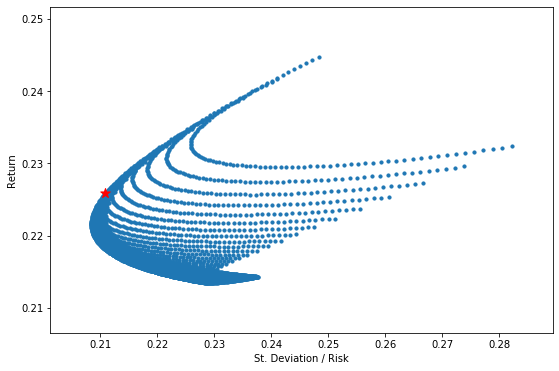

In [34]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(an_std,an_ret,marker='o',s=10)
ax.scatter(std_p,ret_p,marker='*',color='r',s=100, label='Maximum Sharpe ratio')
ax.set_xlabel('St. Deviation / Risk')
ax.set_ylabel('Return')

### 6.2. Using optimization function

Instead of looping all possible weights' combinations we can use scipy.optimize library to maximize Sharpe Ratio or minimize negative Sharpe Ratio:

In [35]:
def annualized_performance(weights, df_price):
    returns = pd.Series(np.dot(df_price, weights))
    ret_chngs = (returns - returns.shift(1))/returns.shift(1)
    an_ret = ret_chngs.mean()*252
    an_std = np.std(ret_chngs)*np.sqrt(252)
    return an_ret, an_std

In [36]:
def neg_sharpe_ratio(weights, df_price):
    p_ret, p_std = annualized_performance(weights, df_price)
    return -(p_ret - rf) / p_std

In [37]:
def max_sharpe_ratio(df_price):
    num_assets = df_price.shape[1]
    args = (df_price)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [38]:
max_sharpe = max_sharpe_ratio(df[['AAPL','GOOGL','FB']])

In [39]:
print('Optimum portfolio weights: ', max_sharpe['x'])

Optimum portfolio weights:  [0.7414428  0.07375766 0.18479955]
